In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from Minotauro import PhotovoltaicPanel as PV

In [14]:
df = pd.read_excel('../data_set/salamanca_limpio.xlsx')
df = df.set_index('fecha')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77909 entries, 2019-11-24 12:20:00 to 2020-10-31 23:55:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radiacionSolar   77909 non-null  float64
 1   temperatura      77909 non-null  float64
 2   velocidadViento  77909 non-null  float64
 3   direccionViento  77909 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.0 MB


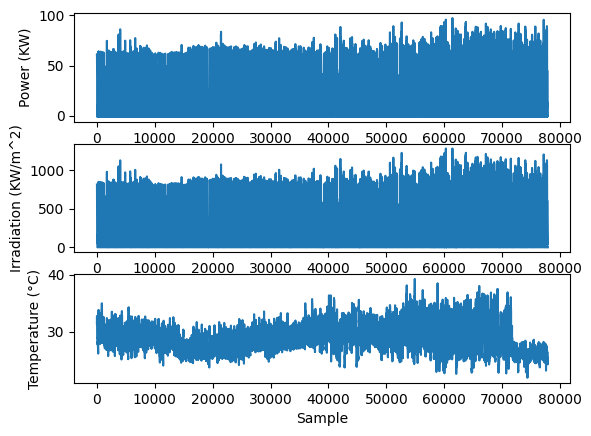

In [18]:
STEPS = len(df['temperatura'])

panel = PV(Vi=12)

power = []

temperature = tuple(df['temperatura'][:STEPS])
irradiation = tuple(df['radiacionSolar'][:STEPS])
voltage = []
current = []

for t, ei in zip(temperature, irradiation):
    panel.T = t
    panel.Ei = ei

    panel.model_init()
    voltage.append(panel.open_circuit_voltage())
    current.append(panel.model_current())
    power.append(panel.open_circuit_voltage()*panel.model_current())

sample = list(range(STEPS))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(sample, power)
ax1.set_ylabel('Power (KW)')

ax2.plot(sample, irradiation)
ax2.set_ylabel('Irradiation (KW/m^2)')

ax3.plot(sample, temperature)
ax3.set_ylabel('Temperature (°C)')
ax3.set_xlabel('Sample')

plt.show()

In [22]:
df['potenciaPV'] = power

In [26]:
df.head()

radiacionSolar  temperatura  velocidadViento  \
fecha                                                               
2019-11-24 12:20:00           814.0        32.64              2.7   
2019-11-24 12:25:00           814.0        32.23              2.7   
2019-11-24 12:30:00           813.0        31.71              3.0   
2019-11-24 12:35:00           801.0        31.23              3.3   
2019-11-24 12:40:00           794.0        31.64              2.3   

                     direccionViento  potenciaPV  
fecha                                             
2019-11-24 12:20:00               45   61.248747  
2019-11-24 12:25:00               48   61.351449  
2019-11-24 12:30:00               38   61.398789  
2019-11-24 12:35:00               35   60.521480  
2019-11-24 12:40:00               29   59.842619

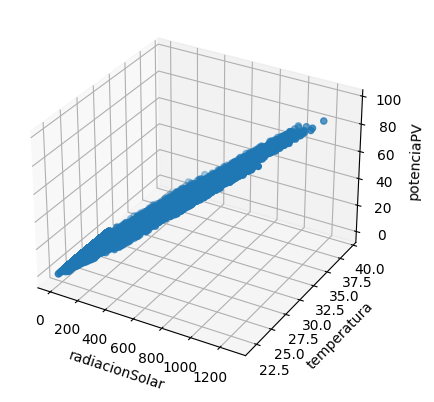

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['radiacionSolar']
y = df['temperatura']
z = df['potenciaPV']

ax.set_xlabel("radiacionSolar")
ax.set_ylabel("temperatura")
ax.set_zlabel("potenciaPV")

ax.scatter(x, y, z)

plt.show()

In [42]:
def normalizar_array(func):
    def inner(x):
        xmax = np.max(x)
        xmin = np.min(x)

        return func(x, xmax, xmin)

    return inner


@normalizar_array
def normalizar(x, xmax, xmin):
    return 2*(x - xmin)/(xmax - xmin) - 1

In [43]:
df['temperaturaNormalizada'] = normalizar(df['temperatura'])
df['radiacionSolarNormalizada'] = normalizar(df['radiacionSolar'])
df['potenciaPVNormalizada'] = normalizar(df['potenciaPV'])

In [44]:
df.head()

radiacionSolar  temperatura  velocidadViento  \
fecha                                                               
2019-11-24 12:20:00           814.0        32.64              2.7   
2019-11-24 12:25:00           814.0        32.23              2.7   
2019-11-24 12:30:00           813.0        31.71              3.0   
2019-11-24 12:35:00           801.0        31.23              3.3   
2019-11-24 12:40:00           794.0        31.64              2.3   

                     direccionViento  potenciaPV  temperaturaNormalizada  \
fecha                                                                      
2019-11-24 12:20:00               45   61.248747                0.235566   
2019-11-24 12:25:00               48   61.351449                0.188222   
2019-11-24 12:30:00               38   61.398789                0.128176   
2019-11-24 12:35:00               35   60.521480                0.072748   
2019-11-24 12:40:00               29   59.842619                0.120092   

                     radiacionSolarNormalizada  potenciaPVNormalizada  
fecha                                                                  
2019-11-24 12:20:00                   0.272300               0.267734  
2019-11-24 12:25:00                   0.272300               0.269817  
2019-11-24 12:30:00                   0.270736               0.270778  
2019-11-24 12:35:00                   0.251956               0.252977  
2019-11-24 12:40:00                   0.241002               0.239203

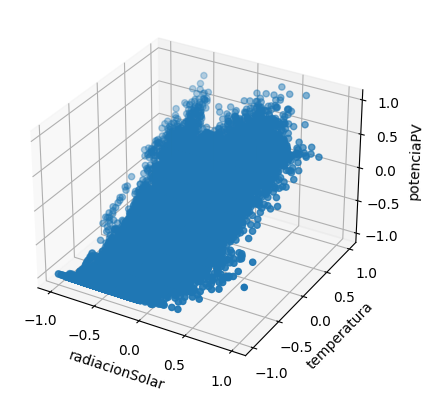

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['temperaturaNormalizada']
y = df['radiacionSolarNormalizada']
z = df['potenciaPVNormalizada']

ax.set_xlabel("radiacionSolar")
ax.set_ylabel("temperatura")
ax.set_zlabel("potenciaPV")

ax.scatter(x, y, z)

plt.show()

# Guardar data set

In [46]:
#df.to_excel('../data_set/salamanca_modulo_pv.xlsx', index=True)